Nama: : Jessica Theresia<br>
Email: : me.jessicatheresia@gmail.com<br>
ID Dicoding: : jessica_trs<br>

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Kaggle : https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection
   
2. **Ketentuan Dataset**:
   - Dataset "bank_transactions_data_2.csv"
   - Jumlah Data: 2,512 baris (memenuhi syarat minimal 2,500 baris)
   - Jumlah Fitur: 16 kolom (terdiri dari numerikal & kategorikal)
   - Jenis Data:
    * Numerik: TransactionAmount, CustomerAge, TransactionDuration, LoginAttempts, AccountBalance
    * Kategorikal: TransactionType, Location, CustomerOccupation, Channel, dll.

Repository : https://github.com/Jejetrs/Dicoding-DBS-Camp---ML-Pemula-Module..git

# **2. Import Library**

Pada tahap ini, perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
from google.colab import drive
import zipfile
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold
from sklearn.preprocessing import QuantileTransformer
from scipy.stats import zscore
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# **3. Memuat Dataset**

Pada tahap ini untuk memuat dataset yang memiliki format CSV serta memastikan direktorinya benar, menghubungkan Google Drive ke Colab terlebih dahulu.

In [2]:
# Memuat dataset dari Google Drive
drive.mount('/content/drive')

zip_path = "/content/drive/MyDrive/Dicoding ML Submission/Belajar Machine Learning untuk Pemula/Bank Transaction Dataset for Fraud Detection.zip"
extract_path = "/content/"

with zipfile.ZipFile(zip_path, 'r') as z:
    z.extractall(extract_path)

Mounted at /content/drive


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
csv_files = [f for f in os.listdir(extract_path) if f.endswith(".csv")]
if csv_files:
    csv_path = os.path.join(extract_path, csv_files[0])  # Ambil file CSV pertama

    # Baca dataset
    df = pd.read_csv(csv_path)
    print(df.head())

else:
    print("Tidak ada file CSV yang ditemukan setelah ekstraksi.")

  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70             Doctor                   81 

In [4]:
df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


In [5]:
# Missing value
missing_values = df.isnull().sum()

print("Jumlah missing value per kolom:")
print(missing_values)

total_missing = missing_values.sum()
print(f"\nTotal missing values dalam dataset: {total_missing}")

Jumlah missing value per kolom:
TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

Total missing values dalam dataset: 0


In [6]:
# Deteksi Outlier dengan Z-Score
df_outlier = df.copy()
z_scores = np.abs(zscore(df_outlier.select_dtypes(include=['number'])))
outliers_z = (z_scores > 3).sum(axis=0)

print("\nJumlah Outlier per Kolom (Z-Score > 3):")
print(outliers_z)


Jumlah Outlier per Kolom (Z-Score > 3):
TransactionAmount      48
CustomerAge             0
TransactionDuration     0
LoginAttempts          95
AccountBalance          0
dtype: int64


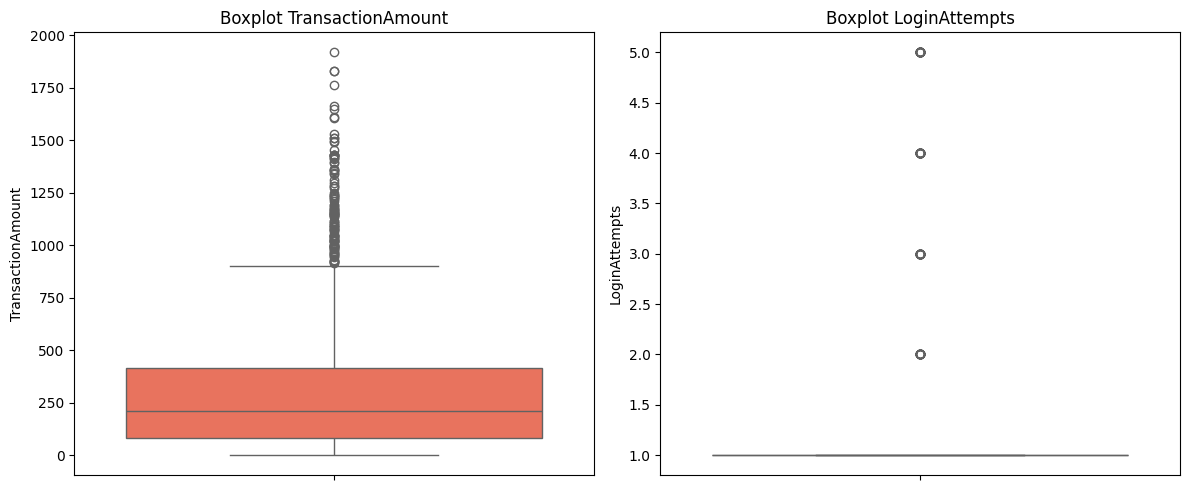

In [7]:
# Visualisasi outlier
outlier_features = ["TransactionAmount", "LoginAttempts"]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i, col in enumerate(outlier_features):
    sns.boxplot(y=df[col], ax=axes[i], color='tomato')
    axes[i].set_title(f"Boxplot {col}")

plt.tight_layout()
plt.show()

In [8]:
# data duplikat
num_duplicates = df.duplicated().sum()
print(f"Jumlah data duplikat: {num_duplicates}")

Jumlah data duplikat: 0


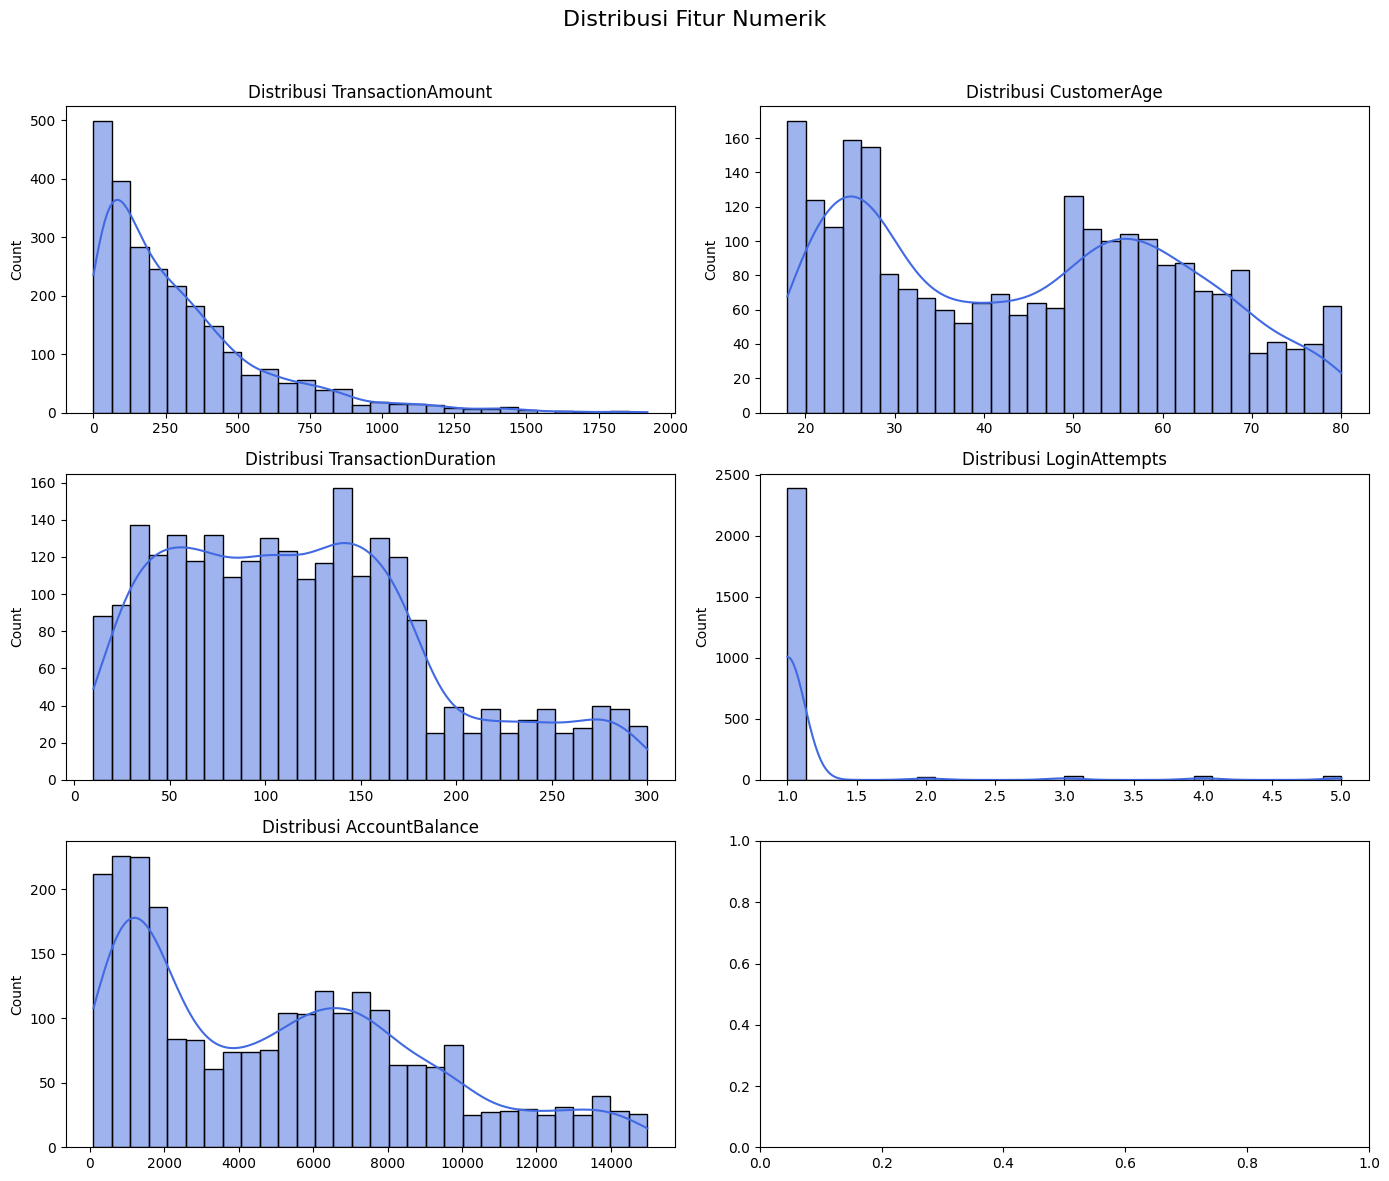

In [9]:
# Visualisasi distribusi fitur numerik
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
fig.suptitle("Distribusi Fitur Numerik", fontsize=16)

numerical_features = ["TransactionAmount", "CustomerAge", "TransactionDuration", "LoginAttempts", "AccountBalance"]
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i], color='royalblue')
    axes[i].set_title(f"Distribusi {col}")
    axes[i].set_xlabel("")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [10]:
# Identifikasi fitur kategorikal
categorical_features = ["TransactionType", "Location", "DeviceID", "IP Address", "MerchantID", "Channel", "CustomerOccupation"]

# Hitung jumlah kategori unik dalam setiap fitur
unique_values = {col: df[col].nunique() for col in categorical_features}
unique_values

{'TransactionType': 2,
 'Location': 43,
 'DeviceID': 681,
 'IP Address': 592,
 'MerchantID': 100,
 'Channel': 3,
 'CustomerOccupation': 4}

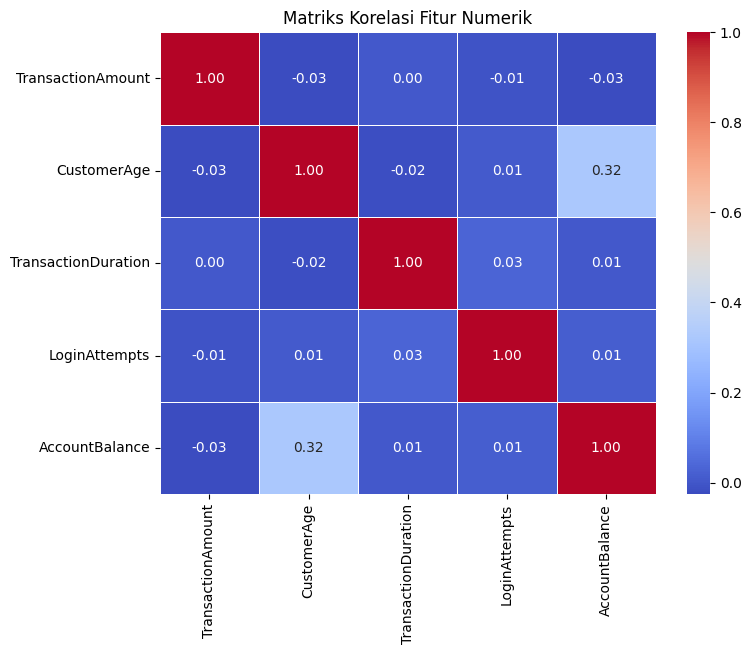

In [11]:
# Hitung korelasi antara fitur numerik
corr_matrix = df[numerical_features].corr()

# Visualisasi heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriks Korelasi Fitur Numerik")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang saya lakukan :
1. Transformasi Quantile untuk TransactionAmount
  * Menggunakan Quantile Transformer untuk mengubah distribusi menjadi normal.
  * Visualisasi histogram sebelum & sesudah transformasi untuk melihat perbedaan distribusi.

2. Penghapusan Kolom yang Tidak Relevan
  * Menghapus kolom seperti TransactionID, AccountID, TransactionDate, dll., karena tidak relevan untuk analisis.

3. Encoding Variabel Kategorikal
  * Menggunakan Label Encoding untuk mengubah variabel kategorikal (TransactionType, Location, dll.) menjadi bentuk numerik.

4. Normalisasi Data Numerik
  * StandardScaler digunakan untuk menstandarisasi fitur numerik (TransactionAmount, CustomerAge, dll.).
  * Log Transform (log1p) diterapkan ke LoginAttempts untuk mengatasi skewness.

5. Visualisasi Korelasi Fitur
  * Heatmap korelasi dibuat untuk melihat hubungan antar fitur numerik setelah preprocessing.

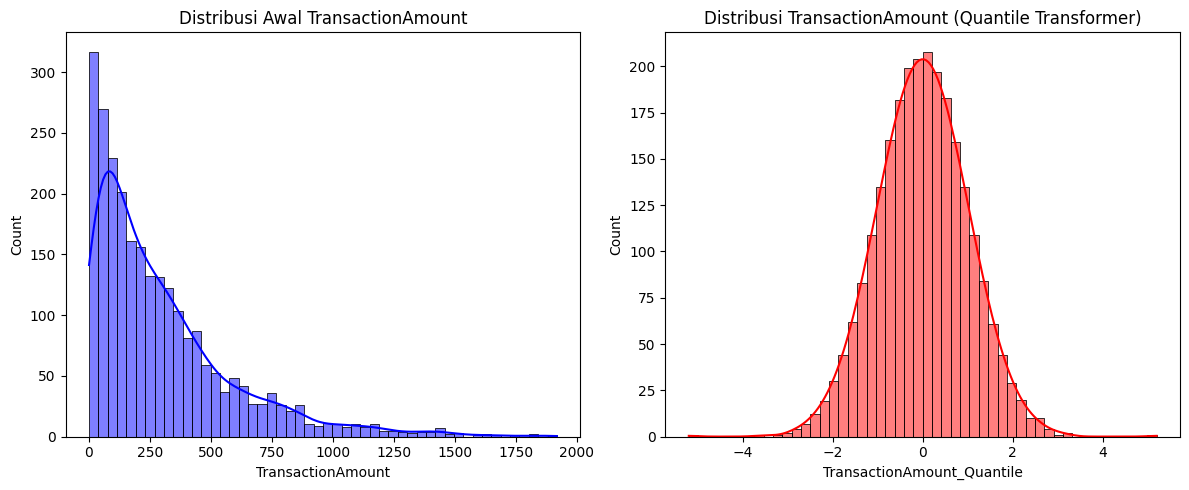

In [12]:
# Transformasi Quantile untuk TransactionAmount

df_transformed = df.copy()

quantile_transformer = QuantileTransformer(output_distribution="normal", random_state=42)
df_transformed["TransactionAmount_Quantile"] = quantile_transformer.fit_transform(df[["TransactionAmount"]])

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df["TransactionAmount"], bins=50, kde=True, color="blue", ax=axes[0])
axes[0].set_title("Distribusi Awal TransactionAmount")

sns.histplot(df_transformed["TransactionAmount_Quantile"], bins=50, kde=True, color="red", ax=axes[1])
axes[1].set_title("Distribusi TransactionAmount (Quantile Transformer)")

plt.tight_layout()
plt.show()

In [13]:
# Menghapus kolom yang tidak relevan (jika ada)
columns_to_drop = ['TransactionID', 'AccountID', 'TransactionDate', 'PreviousTransactionDate','IP Address']
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

print("Tipe data sebelum encoding:\n", df.dtypes)

Tipe data sebelum encoding:
 TransactionAmount      float64
TransactionType         object
Location                object
DeviceID                object
MerchantID              object
Channel                 object
CustomerAge              int64
CustomerOccupation      object
TransactionDuration      int64
LoginAttempts            int64
AccountBalance         float64
dtype: object


In [14]:
# Encoding Variabel Kategorikal
categorical_features = ["TransactionType", "Location", "DeviceID", "MerchantID", "Channel", "CustomerOccupation"]
categorical_features = [col for col in categorical_features if col in df.columns]
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print("Kolom setelah encoding:\n", df.columns)

Kolom setelah encoding:
 Index(['TransactionAmount', 'TransactionType', 'Location', 'DeviceID',
       'MerchantID', 'Channel', 'CustomerAge', 'CustomerOccupation',
       'TransactionDuration', 'LoginAttempts', 'AccountBalance'],
      dtype='object')


In [15]:
# Normalisasi data
numeric_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'AccountBalance']
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Normalisasi LoginAttempts
df["LoginAttempts_Scaled"] = np.log1p(df["LoginAttempts"])  # log(1 + x) untuk menghindari log(0) = cocok untuk skewed

# Dataset setelah preprocessing
print("Dataset setelah preprocessing:")

df.head()

Dataset setelah preprocessing:


,TransactionAmount,TransactionType,Location,DeviceID,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,LoginAttempts_Scaled
0,-0.971275,1,36,365,14,0,1.423718,0,-0.552443,1,-0.000537,0.693147
1,0.269440,1,15,50,51,0,1.311287,0,0.305314,1,2.216472,0.693147
2,-0.586882,1,23,229,8,2,-1.443277,3,-0.909842,1,-1.023534,0.693147
3,-0.387456,1,33,182,1,2,-1.049768,3,-1.353017,1,0.885797,0.693147
4,-0.973468,0,1,298,90,2,-1.049768,3,1.120184,1,0.593589,0.693147


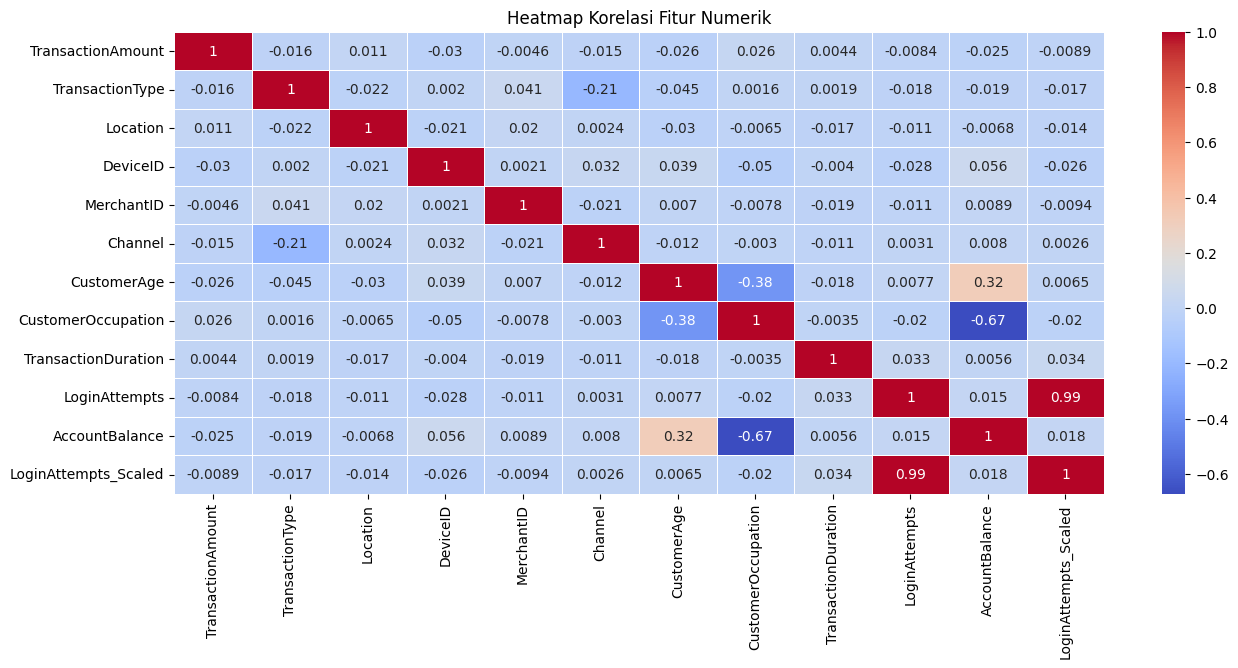

In [16]:
plt.figure(figsize=(15, 6))
numeric_df = df.select_dtypes(include=['number'])

# Membuat heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap Korelasi Fitur Numerik")
plt.show()

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan kemudian melatih model dengan data menggunakan algoritma tersebut.

In [17]:
# Model dengan algoritma KMeans
kmeans_temp = KMeans(n_clusters=2, random_state=42, n_init=20)
labels_temp = kmeans_temp.fit_predict(df)

## **b. Evaluasi Model Clustering**

Evaluasi KMeans Clustering dengan Elbow Method & Silhouette Score
Kode ini bertujuan untuk menentukan jumlah cluster optimal dengan dua metode evaluasi:

1. Elbow Method
* Tujuan: Menganalisis inertia (jumlah total jarak titik ke centroid) untuk menentukan jumlah cluster optimal.

2. Silhouette Score
* Tujuan: Mengevaluasi seberapa baik setiap titik data berada dalam cluster yang benar.

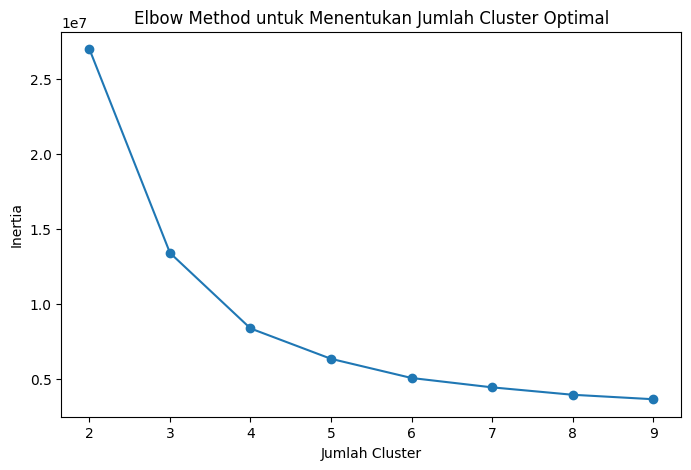

Optimal jumlah cluster (k) berdasarkan Elbow Method: 6


In [18]:
# Evaluasi Elbow
inertia = []
silhouette_scores = []
k_values = range(2, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df, labels))

# Visualisasi Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='-')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster Optimal')
plt.show()

optimal_k_elbow = k_values[np.argmin(np.diff(inertia, 2))]  # Menentukan elbow point
print(f"Optimal jumlah cluster (k) berdasarkan Elbow Method: {optimal_k_elbow}")

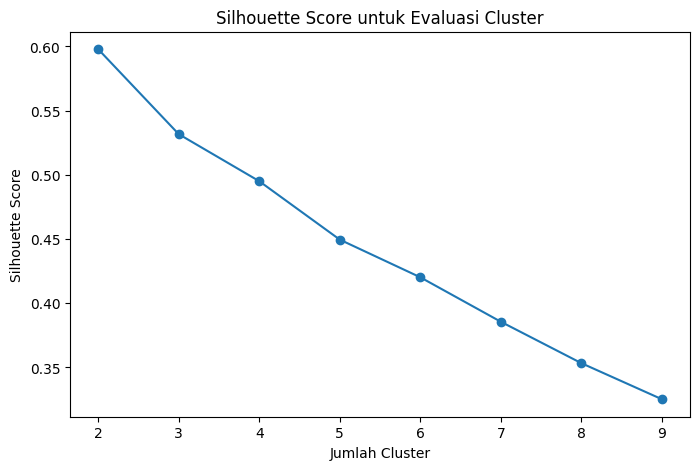

Optimal jumlah cluster (k) berdasarkan Silhouette Score: 2
Silhouette Score tertinggi: 0.5978194896264462


In [19]:
# Evaluasi Silhouette Score

# Visualisasi Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Evaluasi Cluster')
plt.show()

# Mengecek Silhouette Score untuk berbagai metode clustering
optimal_k = k_values[np.argmax(silhouette_scores)]
optimal_silhouette_score = max(silhouette_scores)
print(f"Optimal jumlah cluster (k) berdasarkan Silhouette Score: {optimal_k}")
print(f"Silhouette Score tertinggi: {optimal_silhouette_score}")

## **c. Feature Selection (Opsional)**

Feature selection yang digunakan dalam kode ini adalah SelectKBest dengan mutual_info_classif sebagai metode pemilihan fitur terbaik. Berikut penjelasan singkatnya:

1. SelectKBest (Feature Selection)

  * Tujuan: Memilih 8 fitur terbaik dari dataset berdasarkan hubungan dengan label (target).
  * Metode: Menggunakan mutual information classification, yaitu mengukur hubungan antara setiap fitur dengan target secara non-linear.
  * Hasil: Dataset baru dengan hanya 8 fitur terpilih, yang digunakan untuk analisis lebih lanjut.

2. PCA (Dimensionality Reduction)
  * Tujuan: Mengurangi dimensi fitur terpilih menjadi 3 komponen utama, menjaga informasi utama dari data.
  * Manfaat: Mengurangi kompleksitas data dan meningkatkan efisiensi pemrosesan.

3. KMeans Clustering dengan PCA
  * Menguji jumlah cluster (k) dari 2 hingga 9, dengan mengevaluasi menggunakan Silhouette Score.
  * Memilih jumlah cluster optimal berdasarkan nilai Silhouette Score tertinggi.
  * Menjalankan KMeans dengan jumlah cluster terbaik dan menambahkan label cluster ke dataset.

In [20]:
# SelectKBest dengan 8 fitur terbaik
selector = SelectKBest(score_func=mutual_info_classif, k=8)
X_selected = selector.fit_transform(df, labels_temp)
selected_features = df.columns[selector.get_support()]
df_selected = df[selected_features]

print(f"Fitur yang dipilih setelah SelectKBest: {list(selected_features)}")

# Reduksi dimensi dengan PCA (2 komponen utama)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_selected)

# Clustering dengan KMeans setelah PCA
silhouette_scores = []
k_values = range(2, 10)  # Uji dari 2 sampai 9 cluster

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels = kmeans.fit_predict(df_pca)
    silhouette_scores.append(silhouette_score(df_pca, labels))

# Tentukan jumlah cluster optimal berdasarkan Silhouette Score
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"Optimal jumlah cluster (k) setelah PCA: {optimal_k}")

# Latih ulang KMeans dengan jumlah cluster terbaik
kmeans_pca = KMeans(n_clusters=optimal_k, random_state=42, n_init=20)
labels_pca = kmeans_pca.fit_predict(df_pca)

df['Cluster_KMeans'] = labels_pca

# Evaluasi Silhouette Score terbaik
silhouette_kmeans = silhouette_score(df_pca, labels_pca)
print(f"Silhouette Score KMeans terbaik setelah PCA: {silhouette_kmeans}")

Fitur yang dipilih setelah SelectKBest: ['TransactionAmount', 'Location', 'DeviceID', 'Channel', 'CustomerOccupation', 'LoginAttempts', 'AccountBalance', 'LoginAttempts_Scaled']
Optimal jumlah cluster (k) setelah PCA: 2
Silhouette Score KMeans terbaik setelah PCA: 0.6226672221549462


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

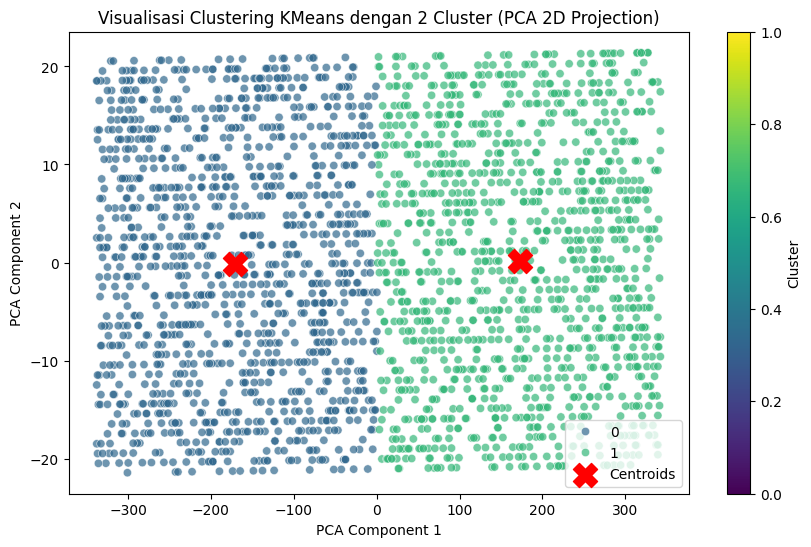

In [21]:
# Visualisasi hasil clustering dengan PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=labels_pca, palette='viridis', alpha=0.7)
plt.scatter(kmeans_pca.cluster_centers_[:, 0], kmeans_pca.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title(f"Visualisasi Clustering KMeans dengan {optimal_k} Cluster (PCA 2D Projection)")
plt.legend()
plt.colorbar(label="Cluster")
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target
Melakukan Inverse Transform pada Data Target Setelah Clustering

Setelah melakukan clustering dengan model KMeans, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya.

In [22]:
# data asli sebelum normalisasi dan label encoding
df_original = df.copy()

# Inversi fitur yang masih ada dalam df_original
for feature in categorical_features:
    if feature in df_original.columns:
        df_original[feature] = label_encoders[feature].inverse_transform(df_original[feature])

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [23]:
# Inverse transform untuk fitur numerik yang telah dinormalisasi/standarisasi
df_original[numeric_cols] = scaler.inverse_transform(df[numeric_cols])

In [24]:
# Hasil dataset setelah inverse transform
print(df_original.head())

   TransactionAmount TransactionType   Location DeviceID MerchantID Channel  \
0              14.09           Debit  San Diego  D000380       M015     ATM   
1             376.24           Debit    Houston  D000051       M052     ATM   
2             126.29           Debit       Mesa  D000235       M009  Online   
3             184.50           Debit    Raleigh  D000187       M002  Online   
4              13.45          Credit    Atlanta  D000308       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0         70.0             Doctor                 81.0              1   
1         68.0             Doctor                141.0              1   
2         19.0            Student                 56.0              1   
3         26.0            Student                 25.0              1   
4         26.0            Student                198.0              1   

   AccountBalance  LoginAttempts_Scaled  Cluster_KMeans  
0         5112.21           

# Analisis karakteristik tiap cluster

In [25]:
# Analisis karakteristik tiap cluster
cluster_summary = df_original.groupby('Cluster_KMeans').agg({
    'TransactionAmount': 'mean',
    'AccountBalance': 'mean',
    'TransactionDuration': 'mean',
    'CustomerAge': 'mean',
}).reset_index()

for index, row in cluster_summary.iterrows():
    print(f"Cluster {int(row['Cluster_KMeans'])}:")
    print(f"Rata-rata Transaction Amount: {row['TransactionAmount']:.2f}")
    print(f"Rata-rata Account Balance: {row['AccountBalance']:.2f}")
    print(f"Rata-rata Transaction Duration: {row['TransactionDuration']:.2f}")
    print(f"Rata-rata Customer Age: {row['CustomerAge']:.2f}")

Cluster 0:
Rata-rata Transaction Amount: 307.43
Rata-rata Account Balance: 4919.30
Rata-rata Transaction Duration: 120.21
Rata-rata Customer Age: 44.39
Cluster 1:
Rata-rata Transaction Amount: 287.64
Rata-rata Account Balance: 5311.49
Rata-rata Transaction Duration: 119.07
Rata-rata Customer Age: 44.96


# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

1.   Cluster 1
* Rata-rata Transaction Amount: 307.43
* Rata-rata Account Balance: 4919.30
* Rata-rata Transaction Duration: 120.21
* Rata-rata Customer Age: 44.39
* Analisis: Cluster ini terdiri dari pelanggan yang memiliki saldo rekening lebih tinggi dibandingkan dengan Cluster 2. Namun, mereka melakukan transaksi dengan jumlah yang sedikit lebih kecil. Pelanggan dalam cluster ini kemungkinan lebih berhati-hati dalam pengeluaran mereka atau memiliki pola transaksi yang lebih stabil.

<br>

2.   Cluster 2
* Rata-rata Transaction Amount: 287.64
* Rata-rata Account Balance: 5311.49
* Rata-rata Transaction Duration: 119.07
* Rata-rata Customer Age: 44.96
* Analisis: Pelanggan Cluster ini cenderung melakukan transaksi dengan nominal lebih tinggi, tetapi mereka memiliki saldo rekening yang sedikit lebih rendah dibandingkan Cluster 0. Ini bisa mengindikasikan bahwa mereka lebih aktif dalam melakukan transaksi atau memiliki kebiasaan berbelanja yang lebih tinggi.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [26]:
# Tentukan nama file dan path penyimpanan
file_name = "Dataset_inisiasi.csv"  # Ganti dengan nama yang diinginkan
output_path = f"/content/drive/MyDrive/Dicoding ML Submission/Belajar Machine Learning untuk Pemula/{file_name}"

# Simpan DataFrame ke dalam file CSV di Google Drive
df_original.to_csv(output_path, index=False)

print(f"Hasil clustering telah disimpan di Google Drive sebagai: {output_path}")

Hasil clustering telah disimpan di Google Drive sebagai: /content/drive/MyDrive/Dicoding ML Submission/Belajar Machine Learning untuk Pemula/Dataset_inisiasi.csv
